In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv');

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null float64
Embarked           891 non-null object
Sex_Transformed    891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


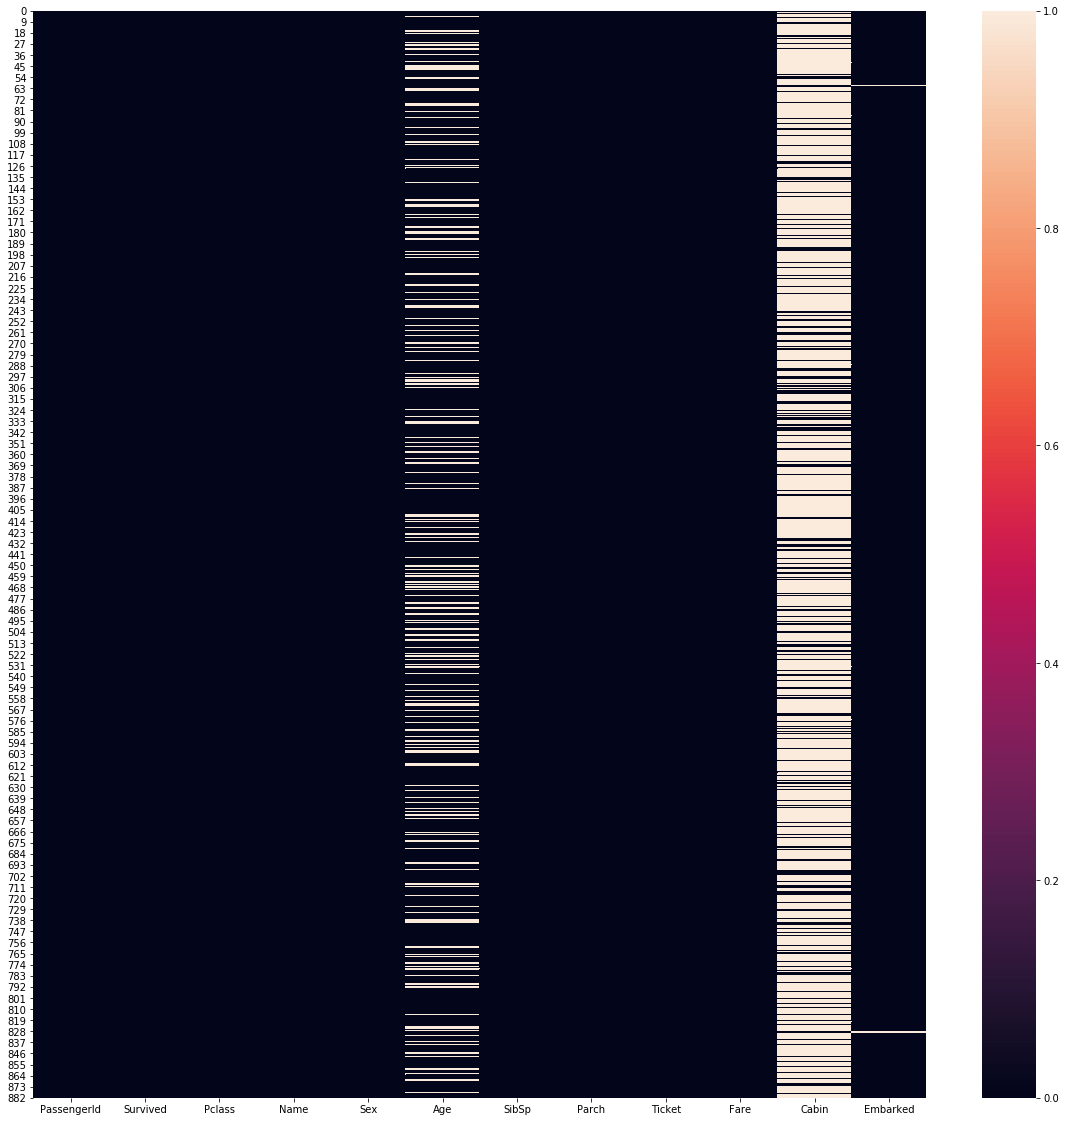

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(data= df.isnull())

In [6]:
null_features = []

for x in df:
    if df[x].isnull().sum() > 0:
        null_features.append(x)
print(null_features)

['Age', 'Cabin', 'Embarked']


In [7]:
df['Age'].dtypes

dtype('float64')

In [8]:
age_size = df['Age'].shape
null_age = df['Age'].isnull().sum()
print(age_size, null_age)

(891,) 177


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
def show_properties(features):
    for x in features:
        nullF = df[x].isnull().sum()
        shapeF = df[x].shape
        typ = df[x].dtypes
        print(x)
        print(nullF, shapeF, typ)

In [11]:
show_properties(null_features)

Age
177 (891,) float64
Cabin
687 (891,) object
Embarked
2 (891,) object


In [12]:
df['Age'] = df['Age'].fillna( df['Age'].mean() )

In [13]:
show_properties(null_features)

Age
0 (891,) float64
Cabin
687 (891,) object
Embarked
2 (891,) object


In [14]:
df['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [15]:
del df['Cabin']

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [17]:
df.shape

(891, 11)

In [18]:
len(df['Name'].unique())

891

In [19]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


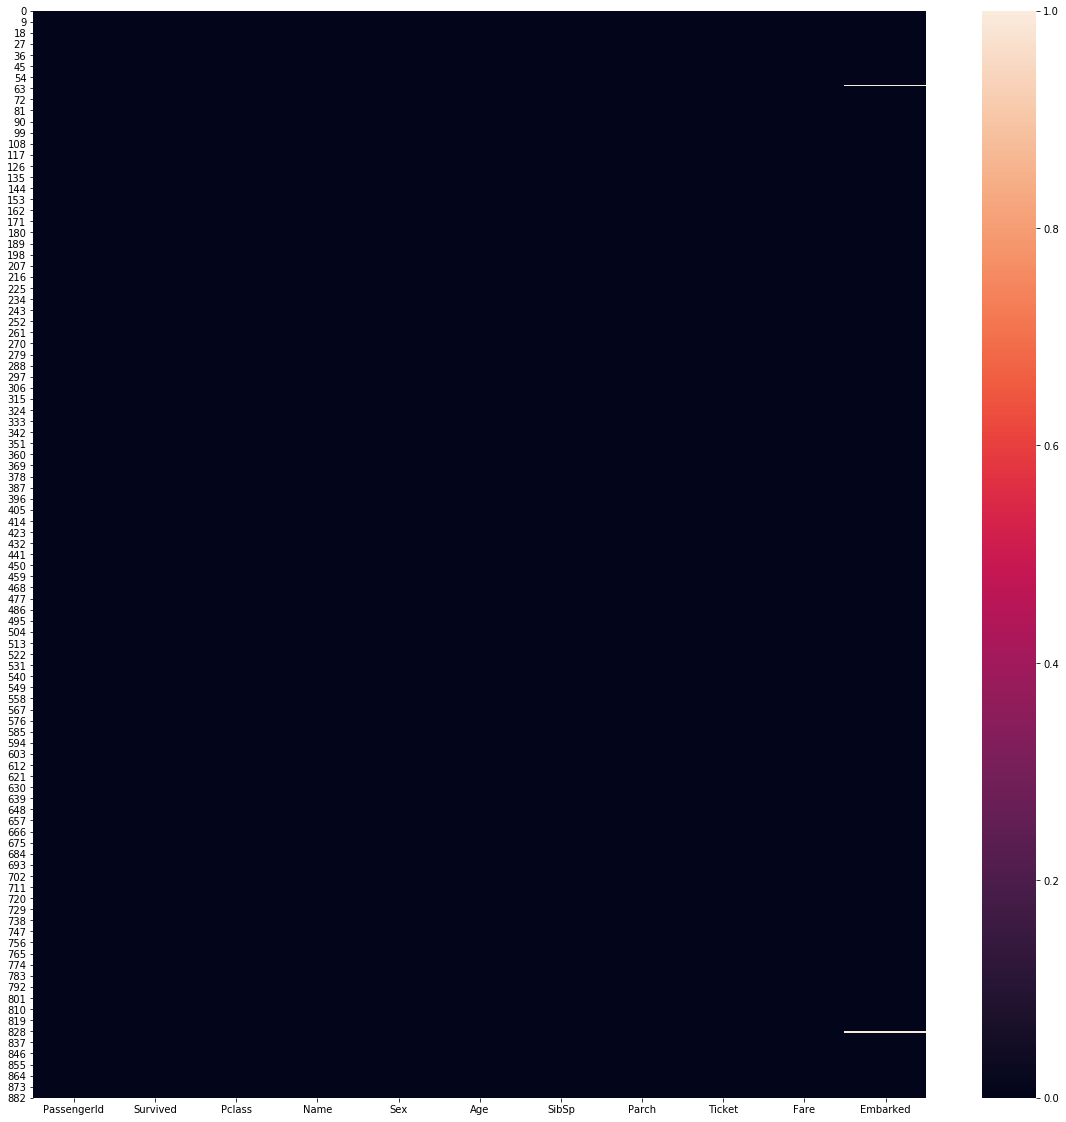

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(data= df.isnull())

In [21]:
df['Embarked'].isnull().sum()

2

In [22]:
df['Embarked'].dtypes

dtype('O')

In [23]:
df['Embarked'] = df['Embarked'].fillna( df['Embarked'].mode )

In [24]:
df['Embarked'].isnull().sum()

0

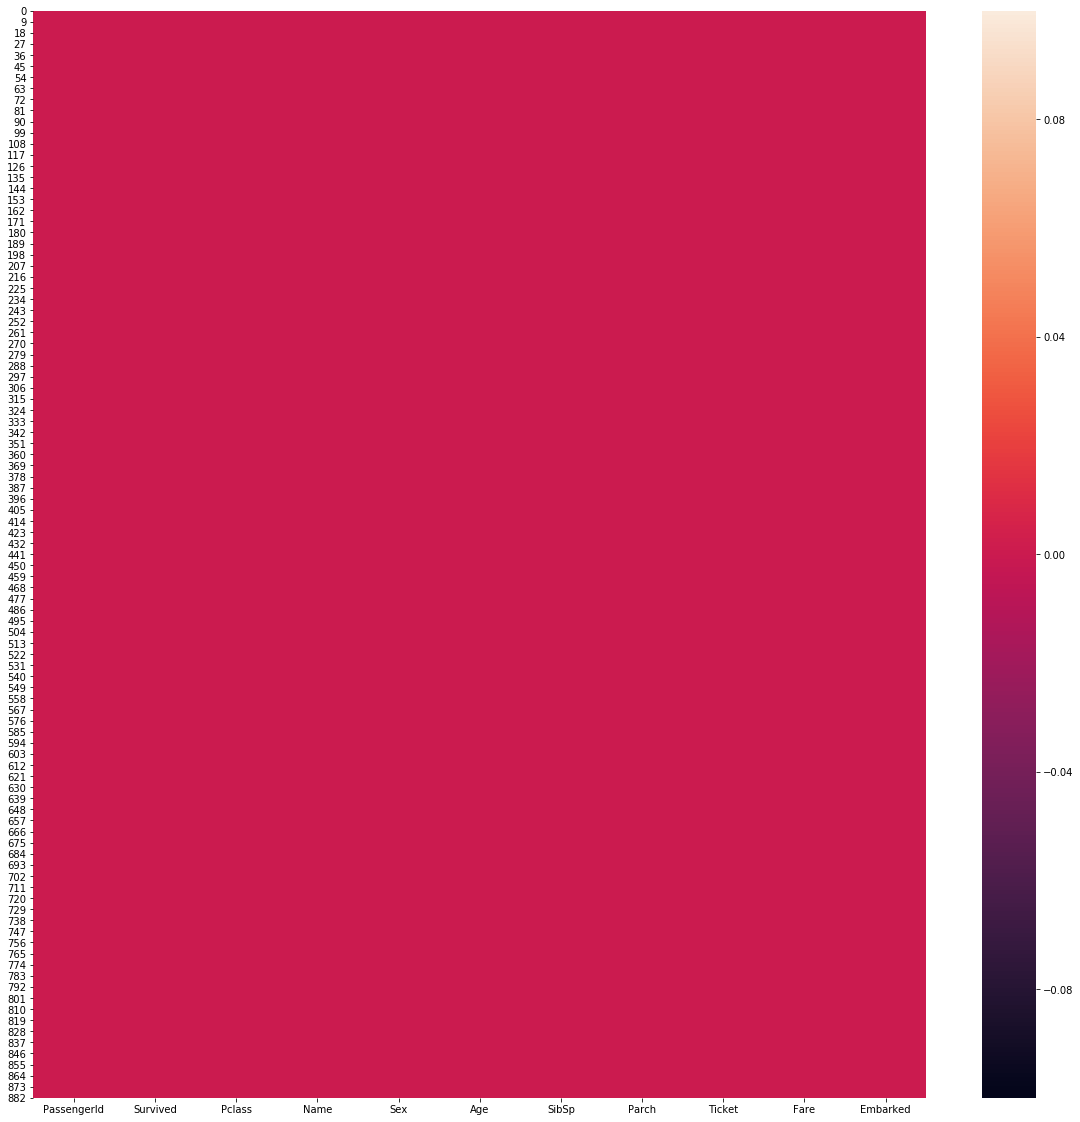

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data= df.isnull())

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [27]:
df['Embarked'].value_counts()

S                                                                                                                                                                                         644
C                                                                                                                                                                                         168
Q                                                                                                                                                                                          77
<bound method Series.mode of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>      2
Name: Embarked, dtype: int64

In [28]:
644 + 168 + 77

889

In [29]:
df['Embarked'].dtypes

dtype('O')

In [30]:
df['Embarked'].isnull().sum()

0

In [31]:
df['Embarked'].isnull().sum()

0

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
df.loc [ df['Embarked'].isnull() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [35]:
df['Embarked'].mode()

0    S
dtype: object

In [36]:
df['Embarked'] = df['Embarked'].fillna( df['Embarked'].mode()[0], )

In [37]:
df['Embarked'].isnull().sum()

0

In [48]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [53]:
del df['Ticket']

In [54]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [149]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [56]:
sex_type = { label: x for x, label in enumerate(np.unique(df['Sex'])) }

In [57]:
sex_type

{'female': 0, 'male': 1}

In [58]:
df['Sex_Transformed'] = df['Sex'].map(sex_type)

In [59]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Transformed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,1


In [61]:
df_new = df.copy()

In [62]:
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Transformed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,1


In [63]:
del df_new['Sex']

In [64]:
df_new

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_Transformed
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,C,1


In [66]:
del df_new['Name']

In [67]:
df_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Transformed
0,1,0,3,22.000000,1,0,7.2500,S,1
1,2,1,1,38.000000,1,0,71.2833,C,0
2,3,1,3,26.000000,0,0,7.9250,S,0
3,4,1,1,35.000000,1,0,53.1000,S,0
4,5,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,S,1
887,888,1,1,19.000000,0,0,30.0000,S,0
888,889,0,3,29.699118,1,2,23.4500,S,0
889,890,1,1,26.000000,0,0,30.0000,C,1


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le =LabelEncoder()

In [116]:
new_emberked = []
for x in df_new['Embarked']:
    new_emberked.append(x)

In [117]:
df_new['Embarked_trans'] = 0

In [118]:
df_new['Embarked_trans']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Embarked_trans, Length: 891, dtype: int64

In [119]:
df_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Transformed,Embarked_trans
0,1,0,3,22.000000,1,0,7.2500,S,1,0
1,2,1,1,38.000000,1,0,71.2833,C,0,0
2,3,1,3,26.000000,0,0,7.9250,S,0,0
3,4,1,1,35.000000,1,0,53.1000,S,0,0
4,5,0,3,35.000000,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,S,1,0
887,888,1,1,19.000000,0,0,30.0000,S,0,0
888,889,0,3,29.699118,1,2,23.4500,S,0,0
889,890,1,1,26.000000,0,0,30.0000,C,1,0


In [163]:
var = ['S', 'C', 'Q']
map_var = [0,1,2]
dic_map = { 'S': 0, 'C': 1, 'Q': 2}
new_embk = []
for x in new_emberked:
    if x == 'S':
        new_embk.append(0)
    elif x == 'C':
        new_embk.append(1)
    else:
        new_embk.append(2)

In [165]:
new_embk

[0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,


In [166]:
df_new['Embarked_trans'] = new_embk

In [167]:
df_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Transformed,Embarked_trans
0,1,0,3,22.000000,1,0,7.2500,S,1,0
1,2,1,1,38.000000,1,0,71.2833,C,0,1
2,3,1,3,26.000000,0,0,7.9250,S,0,0
3,4,1,1,35.000000,1,0,53.1000,S,0,0
4,5,0,3,35.000000,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,S,1,0
887,888,1,1,19.000000,0,0,30.0000,S,0,0
888,889,0,3,29.699118,1,2,23.4500,S,0,0
889,890,1,1,26.000000,0,0,30.0000,C,1,1


In [168]:
del df_new['Embarked']

In [169]:
df_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Transformed,Embarked_trans
0,1,0,3,22.000000,1,0,7.2500,1,0
1,2,1,1,38.000000,1,0,71.2833,0,1
2,3,1,3,26.000000,0,0,7.9250,0,0
3,4,1,1,35.000000,1,0,53.1000,0,0
4,5,0,3,35.000000,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0
887,888,1,1,19.000000,0,0,30.0000,0,0
888,889,0,3,29.699118,1,2,23.4500,0,0
889,890,1,1,26.000000,0,0,30.0000,1,1


In [192]:
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [193]:
df_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_Transformed', 'Embarked_trans'],
      dtype='object')

In [194]:
features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_Transformed', 'Embarked_trans']
label = ['Survived']

x = df_new[features].values
y= df_new[label].values

split_test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42 )

In [201]:
from sklearn.ensemble import RandomForestClassifier
import time

In [202]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
start = time.time()
rf_model.fit(x_train, y_train.ravel())
stop = time.time()

training_time = stop -start

In [204]:
rf_predict_train = rf_model.predict(x_train)
print('Accuracy on training data: {0:.4f}%'.format(metrics.accuracy_score(y_train, rf_predict_train)*100))
print('Learning time: {0}s'.format(training_time))

Accuracy on training data: 97.9133%
Learning time: 0.019910097122192383s


In [199]:
rf_predict_test = rf_model.predict(x_test)
print('Accuracy on training data: {0:.4f}%'.format(metrics.accuracy_score(y_test, rf_predict_test)*100))

Accuracy on training data: 80.9701%


In [200]:
print('Classification report')
print('{0}'.format(metrics.classification_report(y_test, rf_predict_test)))

Classification report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [268]:
from sklearn.naive_bayes import GaussianNB
# instanciating the Naive Bayes Gaussioan model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

nb_predict_train = nb_model.predict(x_train)

from sklearn import metrics

print( 'Model Accuracy: {0:.4f}%'.format(metrics.accuracy_score(y_train, nb_predict_train) *100 ))

nb_predict_test = nb_model.predict(x_test)
print( 'Model Accuracy: {0:.4f}%'.format(metrics.accuracy_score(y_test, nb_predict_test) *100 ) ,'\n')

# print('NaiveBayes prediction on test data:', nb_predict_test)
# print('original y_test:', y_test)

Model Accuracy: 79.9358%
Model Accuracy: 79.8507% 



In [270]:
from sklearn.linear_model import LogisticRegression

lr_model_o = LogisticRegression(C=0.7 , random_state=42, solver='liblinear', max_iter=10000)

lr_model_o.fit(x_train, y_train.ravel())

lr_model_o_predict_train = lr_model_o.predict(x_train)

print ('Accuracy of the training model: {0:.4f}'.format(metrics.accuracy_score(y_train, lr_model_o_predict_train) * 100))

lr_model_o_predict_test = lr_model_o.predict(x_test)

print( 'Accuracy on the test data: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_model_o_predict_test) * 100 ))

Accuracy of the training model: 80.5778
Accuracy on the test data: 80.5970


In [271]:
from sklearn.linear_model import LogisticRegressionCV

In [272]:
lr_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)

In [273]:
start = time.time()

lr_model.fit(x_train, y_train.ravel())

stop = time.time()

training_time = stop - start

print('Training time: {0}'.format(training_time))

Training time: 37.70723009109497


In [274]:
lr_predict_train = lr_model.predict(x_train)
print('Accuracy on training data: {0:.4f}%'.format(metrics.accuracy_score(y_train, lr_predict_train)*100))

Accuracy on training data: 77.2071%


In [275]:
lr_predict_test = lr_model.predict(x_test)
print('Accuracy on testing data: {0:.4f}%'.format(metrics.accuracy_score(y_test, lr_predict_test)*100))

Accuracy on testing data: 82.0896%


In [276]:
print('Classification report')
print('{0}'.format(metrics.classification_report(y_test, lr_predict_test)))

Classification report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       157
           1       0.76      0.82      0.79       111

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



In [277]:
testDf = pd.read_csv('modifiedTest.csv')

In [278]:
testDf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_trans,Sex_Transformed
0,892,3,34.50000,0,0,7.8292,0,0
1,893,3,47.00000,1,0,7.0000,1,1
2,894,2,62.00000,0,0,9.6875,0,0
3,895,3,27.00000,0,0,8.6625,1,0
4,896,3,22.00000,1,1,12.2875,1,1
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0
414,1306,1,39.00000,0,0,108.9000,2,1
415,1307,3,38.50000,0,0,7.2500,1,0
416,1308,3,30.27259,0,0,8.0500,1,0


In [279]:
f = []
for c in testDf.columns:
    f.append(c)

In [280]:
f

['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_trans',
 'Sex_Transformed']

In [281]:
x_t = testDf[f].values

In [310]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_t = scaler.fit_transform(x_t)

In [311]:
x_t

array([[-1.72791209e+00,  8.73481905e-01,  3.34992599e-01, ...,
        -4.98407056e-01, -1.95594094e+00, -7.55928946e-01],
       [-1.71962474e+00,  8.73481905e-01,  1.32553003e+00, ...,
        -5.13274288e-01, -2.31081630e-01,  1.32287566e+00],
       [-1.71133739e+00, -3.15819190e-01,  2.51417495e+00, ...,
        -4.65088464e-01, -1.95594094e+00, -7.55928946e-01],
       ...,
       [ 1.71133739e+00,  8.73481905e-01,  6.51964577e-01, ...,
        -5.08791885e-01, -2.31081630e-01, -7.55928946e-01],
       [ 1.71962474e+00,  8.73481905e-01,  2.81527671e-16, ...,
        -4.94448198e-01, -2.31081630e-01, -7.55928946e-01],
       [ 1.72791209e+00,  8.73481905e-01,  2.81527671e-16, ...,
        -2.37905978e-01,  1.49377768e+00, -7.55928946e-01]])

In [312]:
lr_model_ounseen = lr_model_o.predict(x_t)

In [313]:
rf_predict_unseen = rf_model.predict(x_t)

In [314]:
lr_predict_unseen = lr_model.predict(x_t)

In [315]:
testDf['Survived'] = rf_predict_unseen

In [316]:
testDf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_trans,Sex_Transformed,Survived
0,892,3,34.50000,0,0,7.8292,0,0,0
1,893,3,47.00000,1,0,7.0000,1,1,0
2,894,2,62.00000,0,0,9.6875,0,0,0
3,895,3,27.00000,0,0,8.6625,1,0,0
4,896,3,22.00000,1,1,12.2875,1,1,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0,0
414,1306,1,39.00000,0,0,108.9000,2,1,0
415,1307,3,38.50000,0,0,7.2500,1,0,0
416,1308,3,30.27259,0,0,8.0500,1,0,0


In [317]:
solution = testDf.copy()

In [318]:
solution = solution.drop(labels=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_trans', 'Sex_Transformed'], axis=1)

In [319]:
solution

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [320]:
solution.to_csv('mySubmission.csv', index=False)

In [321]:
lr_solution = solution.copy()

In [322]:
lr_solution['Survived'] = lr_predict_unseen

In [323]:
lr_solution

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [324]:
lr_solution.to_csv('lr_submission.csv', index=False)

In [325]:

lr_ordinary = lr_solution.copy()

In [326]:
lr_ordinary['Survived'] = lr_model_ounseen

In [327]:
lr_solution.to_csv('lr_o_submission.csv', index=False)